<a href="https://colab.research.google.com/github/prernac-dotcom/image_processing/blob/main/Image_formation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

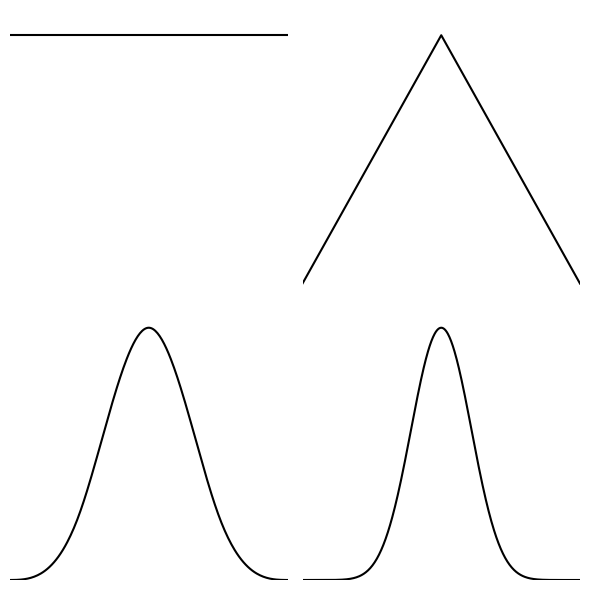

In [ ]:
# how repeated convolution of a uniform 1D signal approaches a Gaussian shape, illustrating the Central Limit Theorem.
import numpy as np
import matplotlib.pyplot as plt

f = np.ones(64)
f = f / np.sum(f)

g = np.convolve(f, f)
g = g / np.sum(g)

h = np.convolve(g, g)
h = h / np.sum(h)

j = np.convolve(h, h)
j = j / np.sum(j)

fig, axs = plt.subplots(2, 2, figsize=(6, 6))

signals = [f, g, h, j]
titles = ['f', 'g', 'h', 'j']

for ax, sig in zip(axs.flat, signals):
    x = np.linspace(-1, 1, len(sig))
    ax.plot(x, sig, 'k')
    ax.set_xlim(-1, 1)
    ax.set_ylim(0, max(sig) * 1.1)
    ax.axis('off')
    ax.set_aspect('auto')

plt.tight_layout()
plt.show()


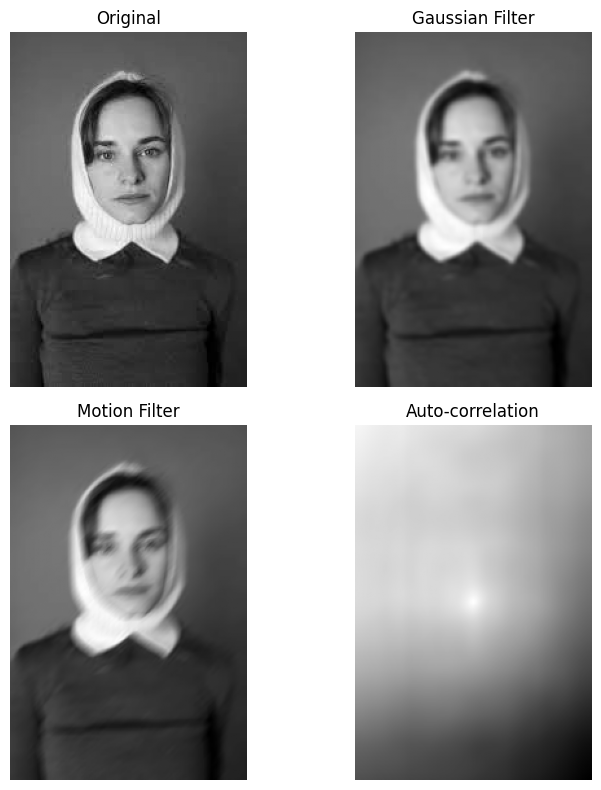

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.ndimage import convolve, rotate

img = cv2.imread('/content/1.png', cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0

psf = cv2.getGaussianKernel(5, 2) @ cv2.getGaussianKernel(5, 2).T

motion = np.zeros((10, 10))
motion[5, :] = 1
motion = rotate(motion, 45, reshape=False)
motion /= motion.sum()

b = convolve2d(img, psf, mode='same', boundary='symm')

c = convolve(img, motion, mode='reflect')

from scipy.signal import correlate2d
d = correlate2d(img, img, mode='same', boundary='symm')

b = np.clip(b, 0, 1)
c = np.clip(c, 0, 1)
d = (d - np.min(d)) / (np.max(d) - np.min(d))

plt.figure(figsize=(8, 8))
plt.subplot(2,2,1); plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title('Original')
plt.subplot(2,2,2); plt.imshow(b, cmap='gray'); plt.axis('off'); plt.title('Gaussian Filter')
plt.subplot(2,2,3); plt.imshow(c, cmap='gray'); plt.axis('off'); plt.title('Motion Filter')
plt.subplot(2,2,4); plt.imshow(d, cmap='gray'); plt.axis('off'); plt.title('Auto-correlation')
plt.tight_layout()
plt.show()
